# **1. Perkenalan Dataset**


##### Dataset yang digunakan adalah dataset Bank Transaction
Dataset ini memberikan pandangan terperinci tentang perilaku transaksional dan pola aktivitas keuangan, ideal untuk menjelajahi deteksi penipuan dan identifikasi anomali. Ini berisi 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri menawarkan wawasan komprehensif tentang perilaku transaksi, memungkinkan analisis untuk keamanan keuangan dan aplikasi deteksi penipuan.

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore, mode
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

## 1. Memahami struktur data

Mengecek baris dan kolom dataset

In [3]:
rows, columns = df.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 2512, Columns: 16


Mengecek info umum tentang dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Mengecek missing values pada dataset

In [5]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Mengecek banyak nilai unik setiap kolom dataset

In [6]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

Mengecek duplicated values

In [7]:
df.duplicated().sum()

np.int64(0)

## 2. Menangani data yang hilang

tidak perlu karena tidak ada missing values

## 3. Analisis distribusi dan korelasi

In [8]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


- Rata-rata jumlah transaksi sekitar 297.59
- Rata-rata usia pelanggan sekitar 44.67 tahun
- Rata-rata durasi transaksi sekitar 119.64 detik
- Rata-rata saldo akun adalah sekitar 5114.30
- Lokasi transaksi yang paling banyak muncul adalah "Fort Worth"

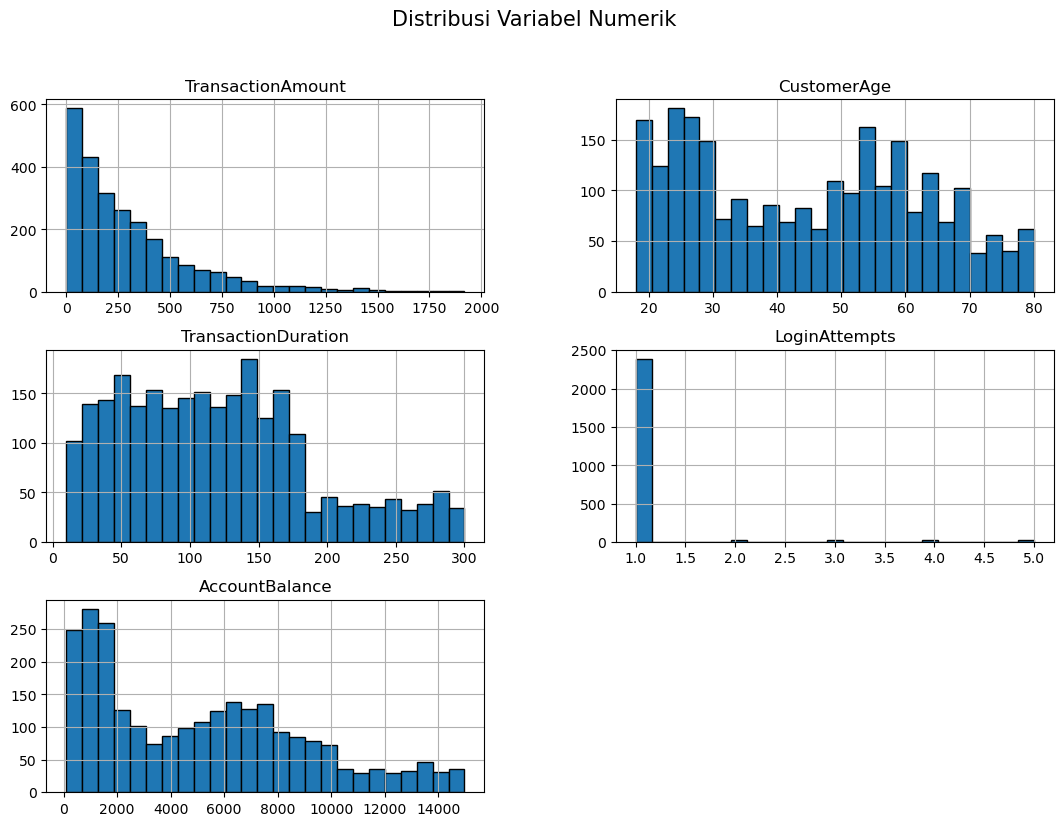

In [9]:
df.hist(figsize=(13, 9), bins=25, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=15)
plt.show()

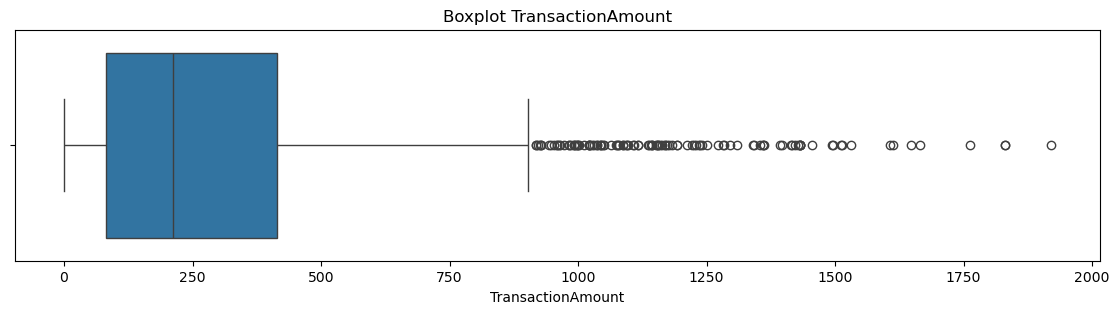

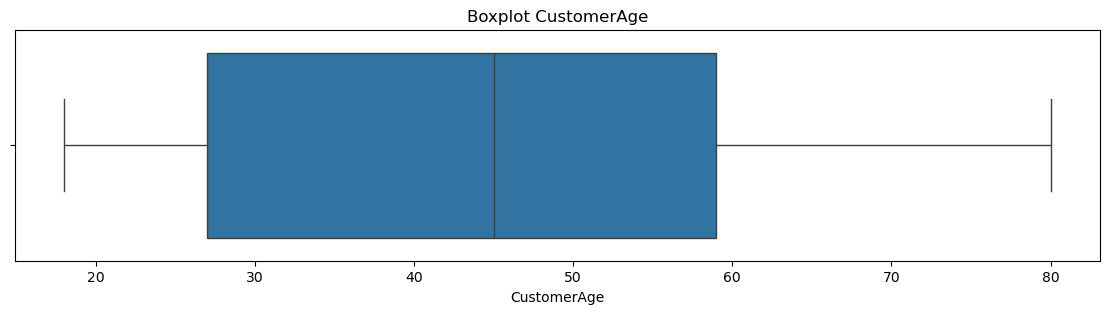

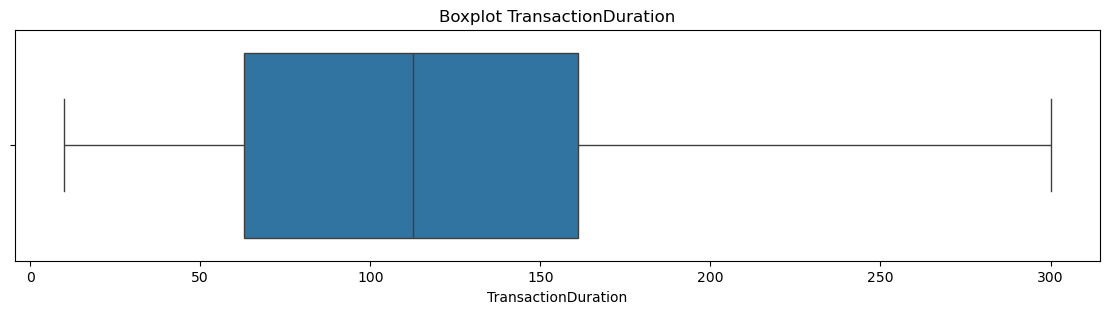

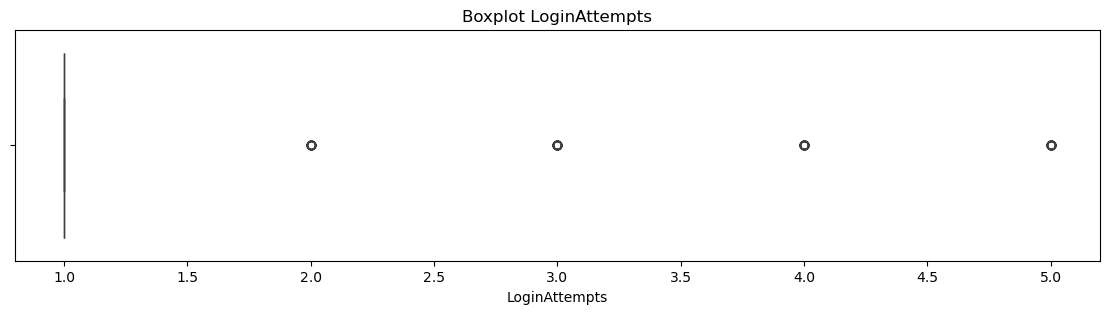

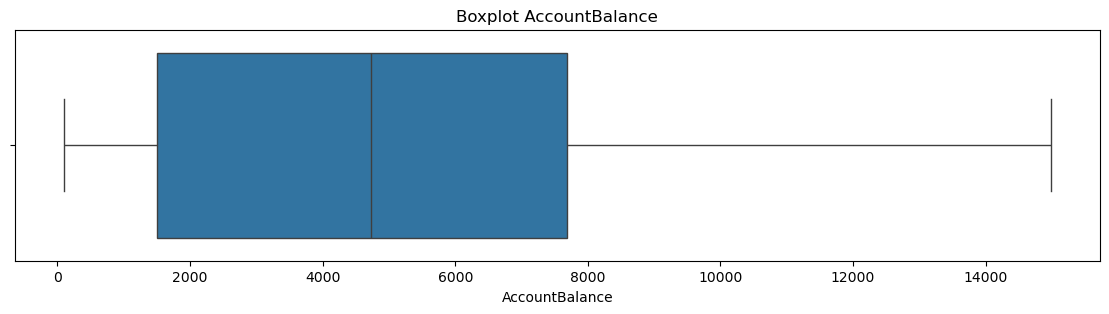

In [10]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(14, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()

- transactionAmount: sebagian besar transaksi berada di rentang 0 - 500 dan beberapa jumlahnya sangat tinggi (outlier)
- CustomerAge: distribusi terlihat bimodal, ada dua kelompok usia yang dominan. dan tidak ada indikasi outlier usia ekstrem yang menonjol.
- TransactionDuration: distribusi cukup merata hingga sekitar 150-200 detik, lalu jumlahnya menurun
- LoginAttemps: distribusi ini tidak seimbang, karena mayoritas transaksi hanya memiliki 1 kali login tetapi ada beberapa yang mencoba 2 hingga 5 kali
- AccountBalance: distribusi right-skewed, dengan mayoritas saldo akun lebih rendah ada juga sebagian akun dengan saldo yang jauh lebih besar (outliers)

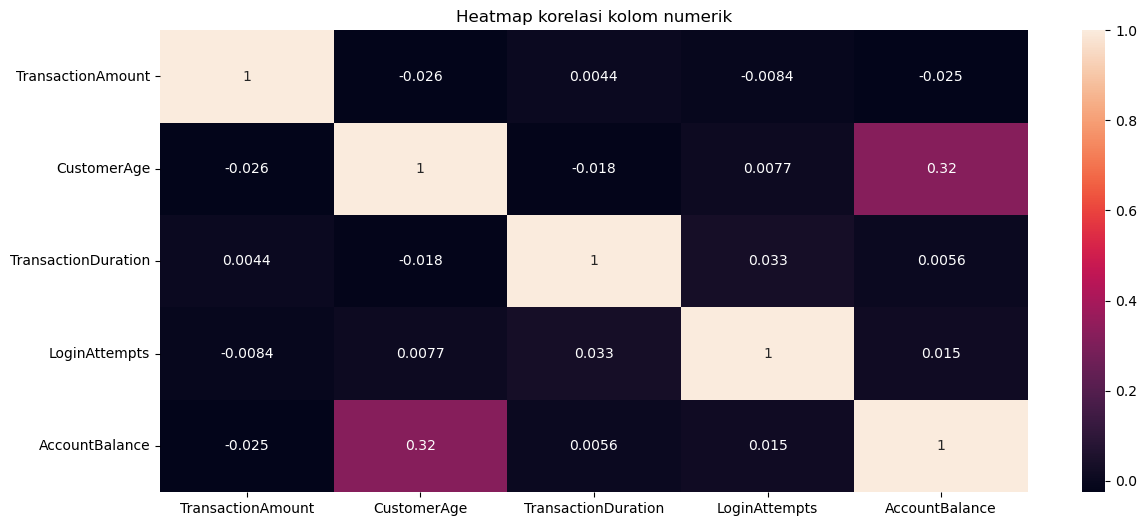

In [11]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.title('Heatmap korelasi kolom numerik')
plt.show()

- Terdapat korelasi positif yang lemah hingga sedang antara CustomerAge dan AccountBalance
- Sebagian besar kolom numerik lainnya menunjukkan korelasi yang sangat lemah/tidak signifikan satu sama lain

## 4. Visualisasi data

#### Barplot perbandingan rata-rata usia dan pekerjaan pelanggan

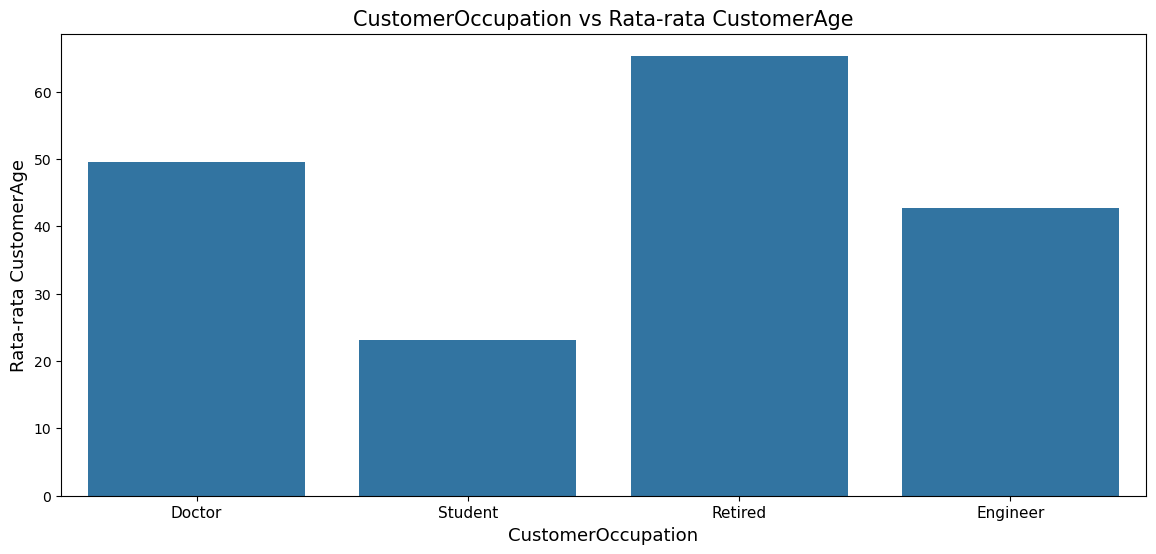

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x='CustomerOccupation', y='CustomerAge', data=df, estimator=np.mean, errorbar=None)
plt.title('CustomerOccupation vs Rata-rata CustomerAge', fontsize=15) 
plt.xlabel('CustomerOccupation', fontsize=13)
plt.ylabel('Rata-rata CustomerAge', fontsize=13)
plt.xticks(fontsize=11)
plt.show()

- customerOccupation "Retired" memiliki rata-rata usia tertinggi, diikuti oleh "Doctor" dan "Engineer", sementara "Student" memiliki rata-rata usia terendah

#### Piechart perbandingan tipe transaksi

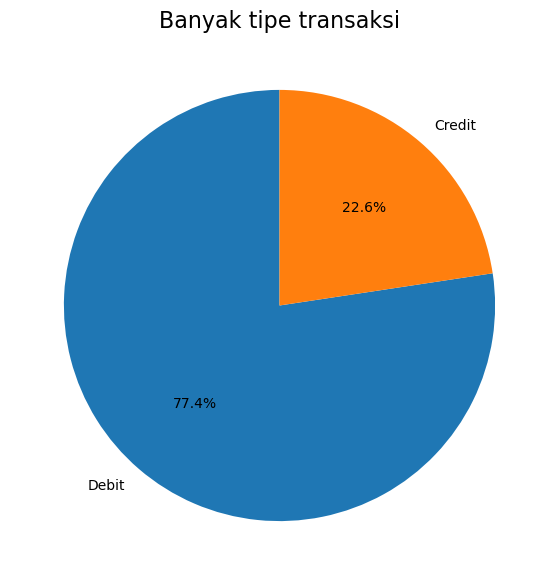

In [13]:
plt.figure(figsize=(7, 7))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Banyak tipe transaksi', fontsize=16)
plt.ylabel('')
plt.show()

Sebagian besar transaksi adalah tipe Debit, sedangkan transaksi Credit lebih sedikit

#### Countplot banyak transaksi berdasarkan channel dan membandingkan tipe transaksi

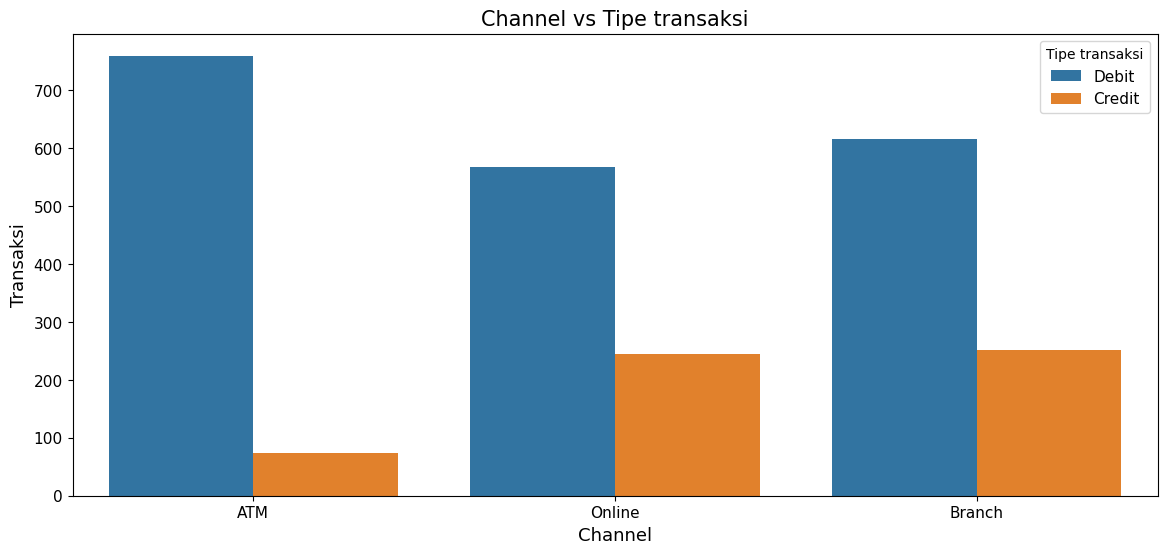

In [14]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Channel', hue='TransactionType', data=df)
plt.title('Channel vs Tipe transaksi', fontsize=15)
plt.xlabel('Channel', fontsize=13)
plt.ylabel('Transaksi', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Tipe transaksi', fontsize=11)
plt.show()

- ATM adalah channel utama untuk transaksi Debit, sedangkan online dan branch memiliki proporsi transaksi Credit yang lebih tinggi (walaupun Debit tetap dominan di semua channel)

#### Scatterplot hubungan banyak transaksi dan saldo pelanggan

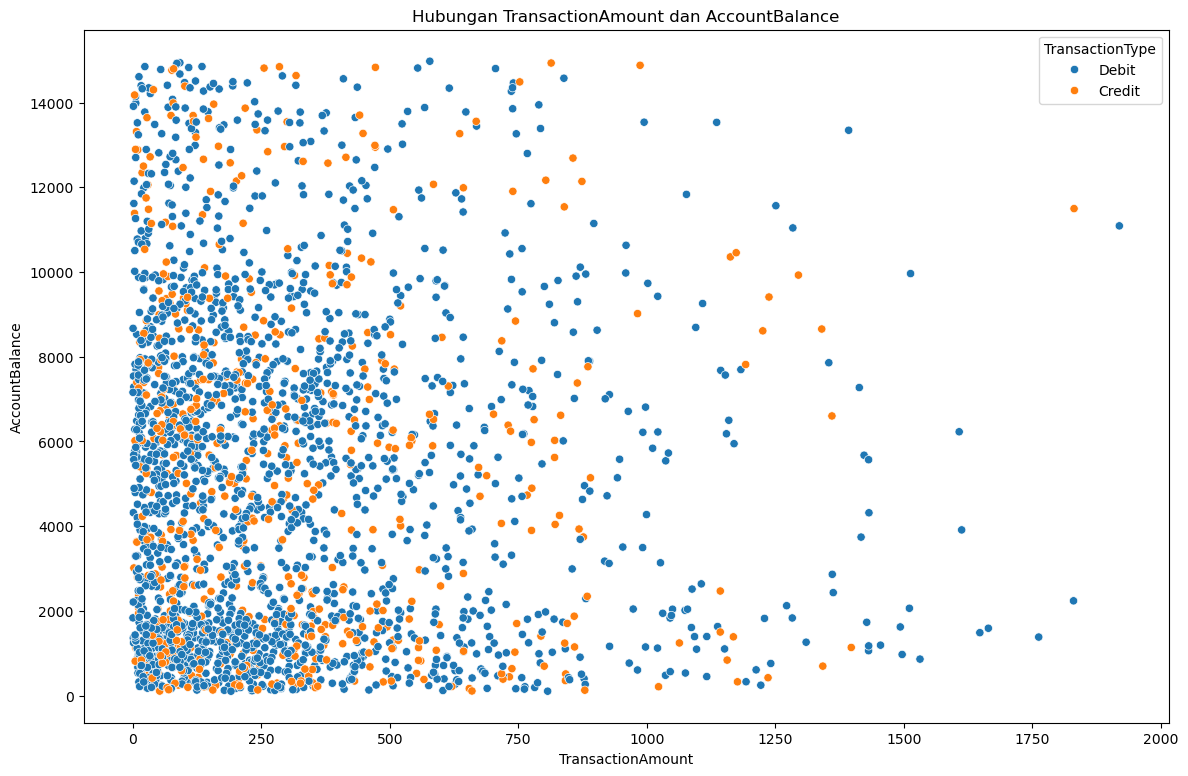

In [15]:
plt.figure(figsize=(14,9))
sns.scatterplot(x=df['TransactionAmount'], y=df['AccountBalance'], hue=df['TransactionType'])
plt.title('Hubungan TransactionAmount dan AccountBalance')
plt.show()

- Sebagian besar transaksi, baik Debit maupun Credit, terjadi dalam rentang TransactionAmount yang kecil

#### Scatterplot hubungan banyak transaksi dan durasinya

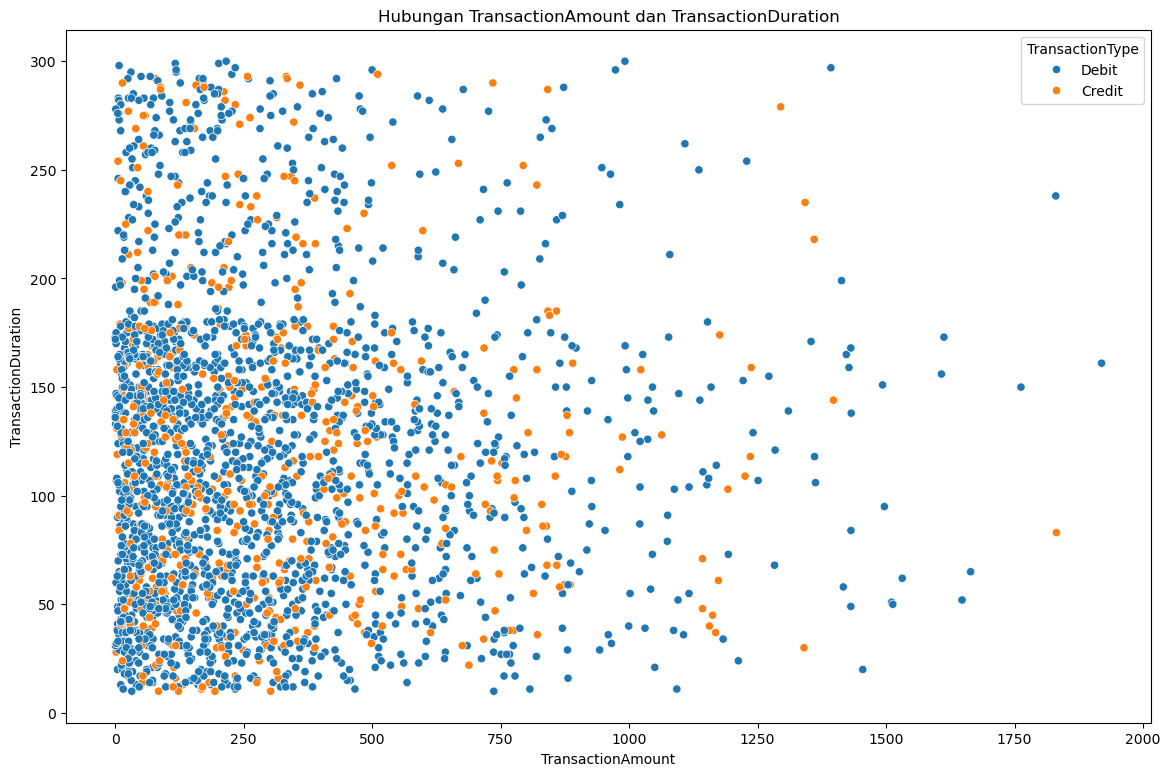

In [16]:
plt.figure(figsize=(14,9))
sns.scatterplot(x=df['TransactionAmount'], y=df['TransactionDuration'], hue=df['TransactionType'])
plt.title('Hubungan TransactionAmount dan TransactionDuration')
plt.show()

- Sebagian besar transaksi, baik Debit maupun Credit, terjadi dengan TransactionAmount yang kecil dan memiliki durasi yang bervariasi
- Jumlah transaksi sepertinya tidak menjadi faktor utama penentu durasi transaksi

#### Scatterplot hubungan banyak transaksi dan usia pelanggan

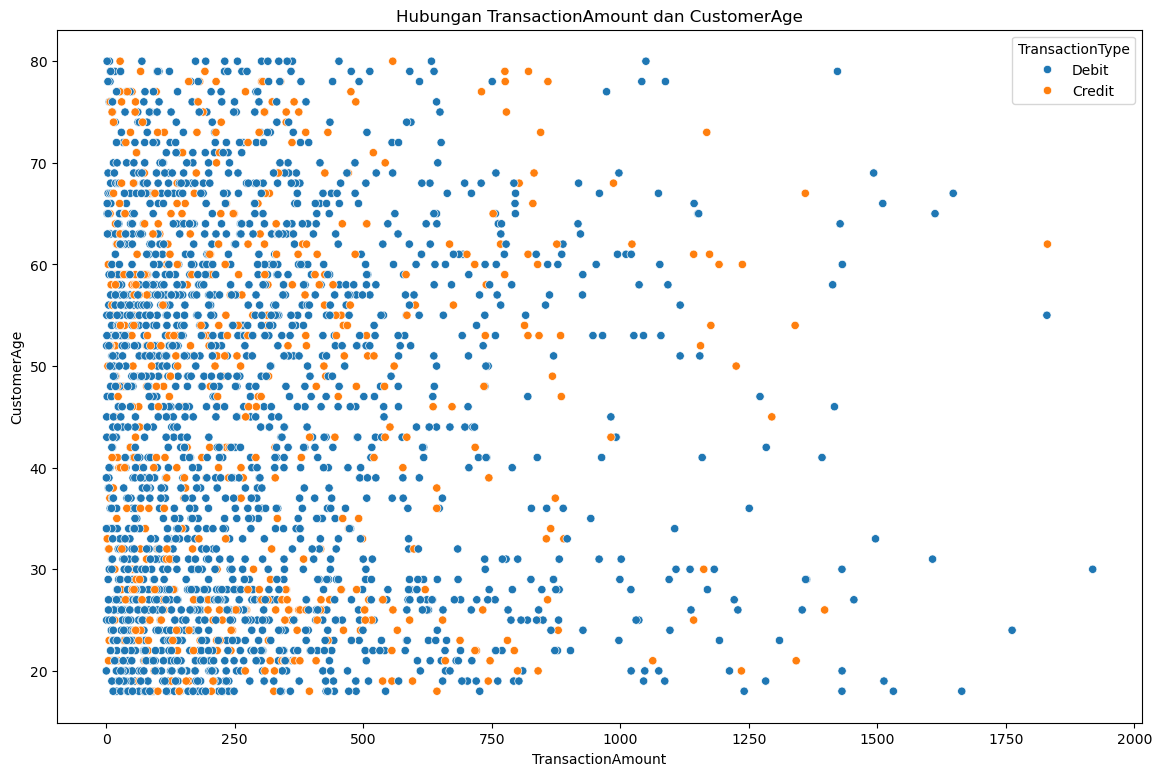

In [17]:
plt.figure(figsize=(14,9))
sns.scatterplot(x=df['TransactionAmount'], y=df['CustomerAge'], hue=df['TransactionType'])
plt.title('Hubungan TransactionAmount dan CustomerAge')
plt.show()

- Usia sepertinya tidak memiliki hubungan linear yang kuat dengan jumlah transaksi dan sepertinya tidak menjadi faktor utama penentu jumlah transaksi

# **5. Data Preprocessing**

Karena saya berencana menggunakan algoritma DBSCAN (density based spatial clustering of application noise), saya tidak perlu encoding data kategorikal karena kolom numerik sudah cukup

#### Mengubah tipe data transactionDate menjadi datetime

In [18]:
df['TransactionDate'] = df['TransactionDate'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

#### Melakukan preprocessing data dengan menormalisasi kolom numerik menggunakan StandardScaler. hasil preprocessing digabungkan menjadi satu dataframe.

In [19]:
categoric_cols = ['TransactionType', 'Channel', 'Location', 'CustomerOccupation']
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categoric_cols]), columns=encoder.get_feature_names_out(categoric_cols))

preprocessed_df = pd.concat([scaled_numeric, encoded_categorical], axis=1)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

#### Algoritma yang digunakan: DBSCAN (density based spatial clustering of application noise)

In [20]:
dbscan = DBSCAN(eps=2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(preprocessed_df)

label_map = {
    -1: 'Fraud',  
    0: 'Normal',
    1: 'Kelompok Mencurigakan 1',
    2: 'Kelompok Mencurigakan 2',
    3: 'Kelompok Mencurigakan 3',
}
df['Cluster_Description'] = df['DBSCAN_Cluster'].map(label_map)

potential_frauds = df[df['DBSCAN_Cluster'] == -1]
print(f"Potensial banyak fraud yang terdeksi DBSCAN: {len(potential_frauds)}")
potential_frauds.head()

Potensial banyak fraud yang terdeksi DBSCAN: 93


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DBSCAN_Cluster,Cluster_Description
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,-1,Fraud
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,-1,Fraud
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,53,Engineer,55,4,2929.91,2024-11-04 08:08:01,-1,Fraud
117,TX000118,AC00498,56.98,2024-01-01 16:34:10,Credit,Oklahoma City,D000256,101.90.40.193,M086,ATM,43,Engineer,122,2,5688.37,2024-11-04 08:07:42,-1,Fraud
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,Debit,New York,D000109,23.92.205.75,M056,Online,41,Doctor,142,5,421.93,2024-11-04 08:10:01,-1,Fraud


## **b. Evaluasi Model Clustering**

Mengecek jumlah data cluster

In [21]:
cluster_counts = df['DBSCAN_Cluster'].value_counts()
print("Distribusi jumlah data di setiap cluster:")
print(cluster_counts)

Distribusi jumlah data di setiap cluster:
DBSCAN_Cluster
 0    2396
-1      93
 2      12
 1       6
 3       5
Name: count, dtype: int64


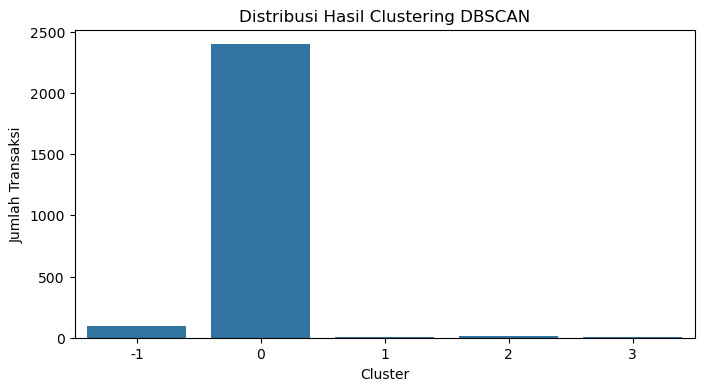

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["DBSCAN_Cluster"])
plt.title("Distribusi Hasil Clustering DBSCAN")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Transaksi")
plt.show()

### Z-score

In [23]:
z_scores = df[numeric_cols].apply(zscore)

outliers = (z_scores > 3) | (z_scores < -3)
df_outliers = df[outliers.any(axis=1)]

overlap = df_outliers[df_outliers.index.isin(potential_frauds.index)]
print(f"Jumlah deteksi DBSCAN yang cocok dengan outlier berdasarkan Z-score: {len(overlap)} dari {len(potential_frauds)}")

Jumlah deteksi DBSCAN yang cocok dengan outlier berdasarkan Z-score: 81 dari 93


DBSCAN mendeteksi 93 transaksi sebagai fraud (-1), dan 81 di antaranya juga terdeteksi sebagai outlier berdasarkan Z-score. DBSCAN bisa dibilang cukup akurat

### Silhoutte score

In [24]:
filtered_df = preprocessed_df[df['DBSCAN_Cluster'] != -1]
filtered_labels = df.loc[df['DBSCAN_Cluster'] != -1, 'DBSCAN_Cluster']

sil_score = silhouette_score(filtered_df, filtered_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3012


Menurut saya score segitu cukup rendah, tetapi masih bisa diterima untuk DBSCAN karena:
- DBSCAN bekerja dengan bentuk cluster yang tidak beraturan, sehingga jarak antar cluster mungkin tidak terpisah secara jelas seperti pada K-Means
- Model sudah cocok dengan Z-Score Outlier Detection (81 dari 93), menunjukkan clustering yang efektif dalam mendeteksi transaksi mencurigakan

## **c. Feature Selection (Opsional)**

#### Tidak melakukan feature selection karena tidak berdampak besar pada hasil clustering dan semua fitur yang digunakan relevan. Untuk mendeteksi anomali, menggunakan semua fitur yang tersedia bisa lebih baik

## **d. Visualisasi Hasil Clustering**

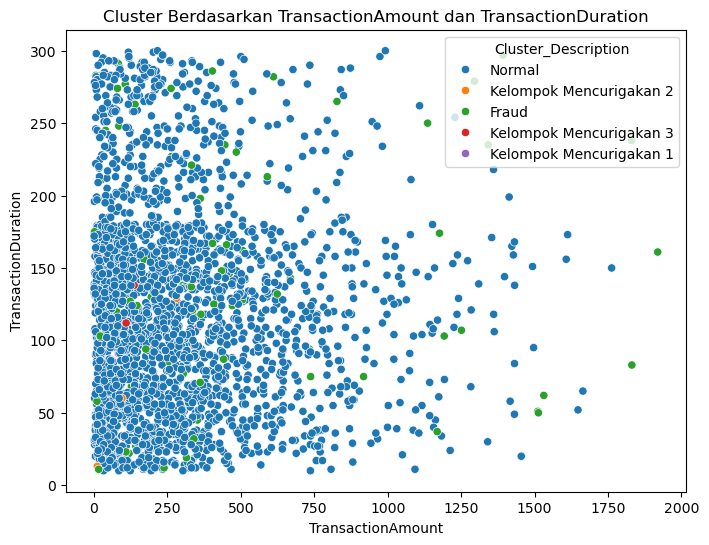

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TransactionAmount'], y=df['TransactionDuration'], hue=df['Cluster_Description'])
plt.title("Cluster Berdasarkan TransactionAmount dan TransactionDuration")
plt.show()

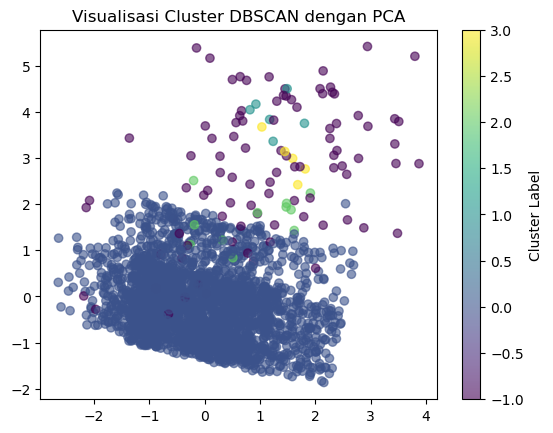

In [26]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(preprocessed_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['DBSCAN_Cluster'], alpha=0.6)
plt.colorbar(label="Cluster Label")
plt.title("Visualisasi Cluster DBSCAN dengan PCA")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Pada tahap preprocessing, data kategorikal diencode menggunakan One-Hot Encoding tanpa menimpa data asli. oleh karena itu, menurut saya tidak perlu interpretasi

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse transform tidak diperlukan karena proses normalisasi dilakukan pada salinan data (scaled_numeric) tanpa menimpa dataset asli (df)

### Mengecek mean, min, max dari setiap kolom numerik berdasarkan cluster

In [27]:
TransactionAmount_stats = df.groupby('DBSCAN_Cluster')['TransactionAmount'].agg(['mean', 'min', 'max']).round(2)
print(f'TransactionAmount: \n{TransactionAmount_stats}')

TransactionAmount: 
                  mean    min      max
DBSCAN_Cluster                        
-1              452.20   1.93  1919.11
 0              292.88   0.26  1762.28
 1              186.87  17.79   353.59
 2              170.90  11.06   396.45
 3              118.21  66.90   152.18


In [28]:
TransactionDuration_stats = df.groupby('DBSCAN_Cluster')['TransactionDuration'].agg(['mean', 'min', 'max']).round(2)
print(f'TransactionDuration: \n{TransactionDuration_stats}')

TransactionDuration: 
                  mean  min  max
DBSCAN_Cluster                  
-1              142.52   11  297
 0              118.92   10  300
 1              100.00   47  162
 2               92.83   13  168
 3              126.40   77  176


In [29]:
AccountBalance_stats = df.groupby('DBSCAN_Cluster')['AccountBalance'].agg(['mean', 'min', 'max']).round(2)
print(f'AccountBalance: \n{AccountBalance_stats}')

AccountBalance: 
                   mean      min       max
DBSCAN_Cluster                            
-1              6084.07   271.78  14851.28
 0              5087.12   101.25  14977.99
 1              2501.66  1442.29   5117.03
 2              4397.79   521.88   9690.15
 3              4957.77  2459.84   6338.35


In [30]:
LoginAttempts_stats = df.groupby('DBSCAN_Cluster')['LoginAttempts'].agg(['mean', 'min', 'max']).round(2)
print(f'LoginAttempts: \n{LoginAttempts_stats}')

LoginAttempts: 
                mean  min  max
DBSCAN_Cluster                
-1              3.52    1    5
 0              1.01    1    2
 1              5.00    5    5
 2              3.00    3    3
 3              4.00    4    4


### Mengecek modus data kategorikal

In [31]:
categoric_stats = df.groupby('DBSCAN_Cluster')[categoric_cols].agg(lambda x: x.mode().iloc[0])
print(f'Modus kategorik: \n{categoric_stats}')

Modus kategorik: 
               TransactionType Channel     Location CustomerOccupation
DBSCAN_Cluster                                                        
-1                       Debit  Online   Fort Worth             Doctor
 0                       Debit  Branch  Los Angeles            Student
 1                       Debit  Branch       Dallas            Retired
 2                       Debit     ATM   Fort Worth           Engineer
 3                       Debit  Online    Charlotte           Engineer


# Analisis Karakteristik Cluster dari Model DBSCAN

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model DBSCAN.

## Cluster -1(Fraud):
- **TransactionAmount:** TransactionAmount memiliki nilai rata-rata **452.20**, dengan batas minimum **1.9** dan maksimum **1919.11**. Ini menunjukkan bahwa transaksi di klaster ini memiliki rentang yang sangat luas, yang bisa mengindikasikan aktivitas anomali
- **TransactionDuration:** TransactionDuration memiliki rata-rata **142.52** detik, dengan durasi minimum **11** detik dan maksimum **297** detik. Ini lebih tinggi dibanding beberapa klaster lain
- **AccountBalance:** AccountBalance rata-rata **6084.07**, dengan saldo minimum **271.78** dan maksimum **14851.28**. Ini menunjukkan adanya akun dengan saldo yang sangat tinggi
- **LoginAttempts:** LoginAttempts rata-rata **3.52**, dengan minimum **1** dan maksimum **5**, menunjukkan beberapa akun mencoba login berkali-kali sebelum melakukan transaksi
- **Kategori dominan:** Transaksi Debit, melalui Online Channel, dilakukan di Fort Worth, dengan pelanggan yang bekerja sebagai Doctor
- **Analisis:** Cluster ini mencakup transaksi yang dianggap fraud. karena memiliki jumlah transaksi yang lebih tinggi daripada normal, dengan jumlah login attempts yang lebih banyak dari cluster normal
 
## Cluster 0(Normal):
- **TransactionAmount:** TransactionAmount rata-rata **292.88**, lebih rendah dari klaster -1, dengan minimum **0.26** dan maksimum **1762.28**
- **TransactionDuration:** TransactionDuration rata-rata **118.92** detik, dengan minimum **10** detik dan maksimum **300** detik
- **AccountBalance:** AccountBalance rata-rata **5087.12**, dengan minimum 101.25 dan maksimum **14977.99**
- **LoginAttempts:** LoginAttempts rata-rata **1.01**, menunjukkan sebagian besar transaksi dilakukan dengan satu kali login tanpa percobaan ulang
- **Kategori dominan:** Kategori yang dominan: Transaksi Debit, dilakukan melalui Branch, di Los Angeles, dengan pelanggan yang bekerja sebagai Student
- **Analisis:** Cluster ini mencakup transaksi yang dianggap normal. karena jumlah transaksi yang lebih kecil dan login attempts yang rendah mengindikasikan bahwa pengguna melakukan transaksi dengan lancar tanpa banyak upaya masuk ulang, yang merupakan pola khas dari aktivitas pengguna sah

## Cluster 1(Kelompok mencurigakan 1):
- **TransactionAmount:** TransactionAmount rata-rata **186.87**, dengan batas minimum **17.79** dan maksimum **353.59**
- **TransactionDuration:** TransactionDuration rata-rata **100.00** detik, lebih rendah dibandingkan klaster normal
- **AccountBalance:** AccountBalance rata-rata **2501.66**, dengan minimum 1442.29 dan maksimum **5117.03**
- **LoginAttempts:** LoginAttempts rata-rata **5.00**, dengan minimum dan maksimum sama-sama **5**, yang berarti semua transaksi di klaster ini dilakukan setelah 5 kali percobaan login, yang bisa menjadi indikasi aktivitas mencurigakan
- **Kategori dominan:** Transaksi Debit, dilakukan melalui Branch, di Dallas, dengan pelanggan yang bekerja sebagai Retired
- **Analisis:** Cluster ini mencakup transaksi yang memiliki jumlah transaksi yang lebih rendah dari transaksi normal, tetapi dengan login attempts yang sangat tinggi


## Cluster 2(Kelompok mencurigakan 2):
- **TransactionAmount:** TransactionAmount rata-rata **170.90**, dengan batas minimum **11.06** dan maksimum **396.45**
- **TransactionDuration:** TransactionDuration rata-rata **92.83** detik, dengan batas minimum **13** detik dan maksimum **168** detik
- **AccountBalance:** AccountBalance rata-rata **4397.79**, dengan minimum **521.88** dan maksimum **9690.15**
- **LoginAttempts:** LoginAttempts rata-rata **3.00**, yang berarti transaksi di klaster ini melibatkan beberapa kali percobaan login sebelum berhasil
- **Kategori dominan:** Transaksi Debit, dilakukan melalui ATM, di Fort Worth, dengan pelanggan yang bekerja sebagai Engineer
- **Analisis:** Cluster ini mencakup transaksi yang memiliki jumlah transaksi yang lebih kecil tetapi jumlah login attempts yang lebih tinggi

## Cluster 3(Kelompok mencurigakan 3):
- **TransactionAmount:** TransactionAmount rata-rata **118.21**, dengan batas minimum **66.90** dan maksimum **152.18**
- **TransactionDuration:** TransactionDuration rata-rata **126.40** detik, dengan batas minimum **77** detik dan maksimum **176** detik
- **AccountBalance:** AccountBalance rata-rata **4957.77**, dengan minimum **2459.84** dan maksimum **6338.35**
- **LoginAttempts:** LoginAttempts rata-rata **4.00**, menunjukkan adanya beberapa kali percobaan login sebelum transaksi dilakukan
- **Kategori dominan:** Transaksi Debit, dilakukan melalui Online Channel, di Charlotte, dengan pelanggan yang bekerja sebagai Engineer
- **Analisis:** Cluster ini mencakup transaksi yang memiliki jumlah transaksi yang lebih rendah dari normal, tetapi dengan login attempts yang tinggi dan durasi transaksi yang mirip dengan normal

# **7. Mengeksport Data**

In [32]:
df.to_csv('clustered_data.csv', index=False)